In [2]:
from langgraph.graph import StateGraph, START, END

class NumberState(dict):
    number : int  

def check_number(state: NumberState):
    print(f"Checking number: {state['number']}")
    return state    # we don't change it, just pass it along

def say_even(state: NumberState):
    print(f"{state['number']} is EVEN")
    return state

def say_odd(state: NumberState):
    print(f"{state['number']} is ODD")
    return state

# -----------------------
# 3. Conditional function
# -----------------------
def is_even_or_odd(state: NumberState):
    if state['number'] % 2 == 0:
        return "even2"         # this must match the branch name
    else:
        return "odd1"

In [5]:
graph= StateGraph(NumberState)

graph.add_node("check_number", check_number)
graph.add_node("say_even", say_even)
graph.add_node("say_odd", say_odd)

graph.add_edge(START, "check_number")
graph.add_conditional_edges(
    "check_number", is_even_or_odd, 
    {"even2": "say_even", "odd1": "say_odd"}
)
graph.add_edge("say_even", END)
graph.add_edge("say_odd", END)


workflow = graph.compile()

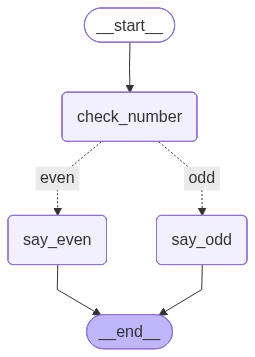

In [11]:
workflow

In [6]:
workflow.invoke({'number': 42})

Checking number: 42
42 is EVEN


{'number': 42}